In [11]:
# mostly copied from https://github.com/mirianfsilva/lorenz-attractor-chaos-theory

import math, sys 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
#from matplotlib import animation

from abstract_defs import *
from transformations import *

In [12]:
rho = 28
sigma = 10
beta = 8/3

rhom1 = rho-1
xp = np.sqrt(beta*rhom1)

#def f_lorenz(t, x_vec):
#    (x, y, z) = x_vec[0:3]
#    x_dot = np.array([sigma * (-x + y),
#                x * (rho - z) - y,
#                x * y - beta * z]) 
#    return x_dot

#px1 = np.array([-sigma, sigma, 0])
#poly_x = Polynomial([0, px1])
#py1 = np.array([rho, -1, 0])
#py2 = np.array([[0, 0, -1],
#                [0, 0, 0],
#                [0, 0, 0]])
#poly_y = Polynomial([0, py1, py2])
#pz1 = np.array([0, 0, -beta])
#pz2 = np.array([[0, 1, 0], 
#                [0, 0, 0], 
#                [0, 0, 0]])
#poly_z = Polynomial([0, pz1, pz2])
#f_lorenz = VectorPolynomial([poly_x, poly_y, poly_z])

order_0 = np.array([0, 0, 0])
order_1 = np.array([[-sigma, sigma, 0],
                    [rho, -1, 0],
                    [0, 0, -beta]])
order_2 = np.zeros([3, 3, 3])
order_2[1, 0, 2] = -1
order_2[2, 0, 1] = 1
f_lorenz = VectorPolynomial([order_0, order_1, order_2])
print(f_lorenz)
                      
def fixed_points():
    fp0 = np.array([0, 0, 0])
    fp1 = np.array([xp, xp, rhom1])
    fp2 = np.array([-xp, -xp, rhom1])
    return np.vstack([fp0, fp1, fp2])

fps = fixed_points()

order_1_p1 = np.array([[-sigma, sigma, 0],
                       [1, -1, -xp],
                       [xp, xp, -beta]])
order_1_p2 = np.array([[-sigma, sigma, 0],
                       [1, -1, xp],
                       [-xp, -xp, -beta]])
fp1_lorenz = VectorPolynomial([order_0, order_1_p1, order_2])
fp2_lorenz = VectorPolynomial([order_0, order_1_p2, order_2])

#print(fp1_lorenz)
#print(fp2_lorenz)

D = 4*rho*sigma+(sigma-1)**2
lambdas_p0 = [-beta, 0.5*((-1-sigma)+np.sqrt(D)), 0.5*((-1-sigma)-np.sqrt(D))]
print(lambdas_p0)

entry 1: 0 + 
-10.0 * x1 + 10.0 * x2 + 
 

entry 2: 0 + 
28.0 * x1 + -1.0 * x2 + 
-1.0 * x1 * x3 

entry 3: 0 + 
-2.6666666666666665 * x3 + 
1.0 * x1 * x2 


[-2.6666666666666665, 11.827723451163457, -22.827723451163457]


In [13]:
eigs1, P1 = np.linalg.eig(order_1_p1)
eigs2, P2 = np.linalg.eig(order_1_p2)
eigs_true = [-13.855, -0.0940+10.1945j, -0.0940-10.1945j]
print(eigs1)
print(eigs_true)

[-13.85457791 +0.j           0.09395562+10.19450522j
   0.09395562-10.19450522j]
[-13.855, (-0.094+10.1945j), (-0.094-10.1945j)]


In [14]:
(xsize, ysize) = (8.5, 8.5)

# choose a different color for each trajectory
#colors = plt.cm.viridis(np.linspace(0, 1, 10))
def lorenz_ode_plot_components(t, ys):
    x, y, z = ys[0:3, :]
    plt.figure(figsize=(xsize, ysize))
    plt.plot(t, x, linewidth = 1, color = 'b') 
    plt.plot(t, y, linewidth = 1, color = 'r')
    plt.plot(t, z, linewidth = 1, color = 'g')
    plt.grid(True)
    plt.xlabel('t')
    plt.ylabel('x(t), y(t), z(t)')
    plt.title('Lorenz Time Series Plot')
    
    plt.legend(['x','y','z'], loc = 2)
    #plt.savefig('lorenz_ode_components.png')
    plt.show()
    return 

def lorenz_ode_plot_3d(t, ys, fps):
    x, y, z = ys[0:3, :]
    ax = plt.figure(figsize = (xsize, ysize)).add_subplot(projection='3d')
    ax.plot(x, y, z, linewidth = 0.5, color = 'r')
    ax.plot(fps[:, 0], fps[:, 1], fps[:, 2], 'go')   
    ax.grid(True)
    ax.set_xlabel('x(t)')
    ax.set_ylabel('y(t)')
    ax.set_zlabel('z(t)')
    ax.set_title('Lorenz 3D Plot' )
    
    #plt.savefig('lorenz_ode_3d.png')
    plt.show()
    return

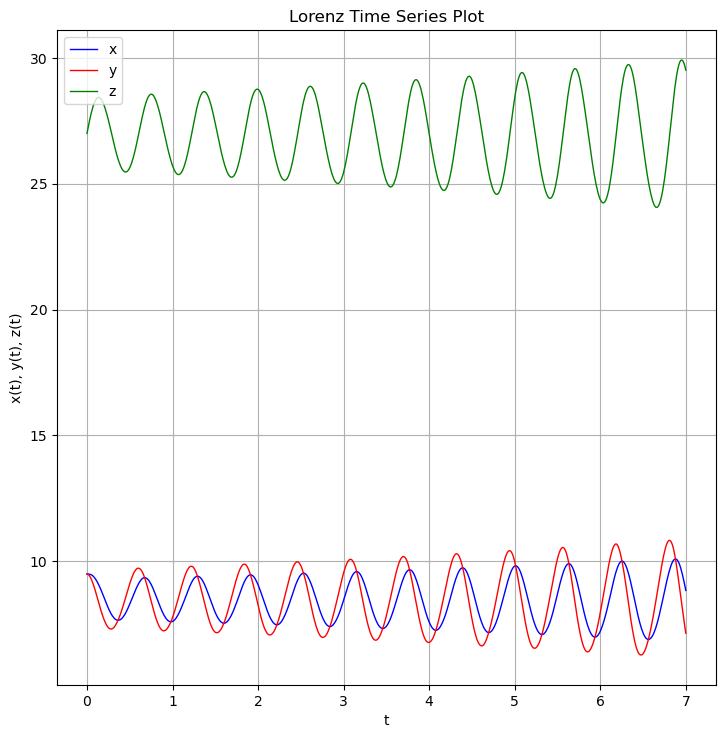

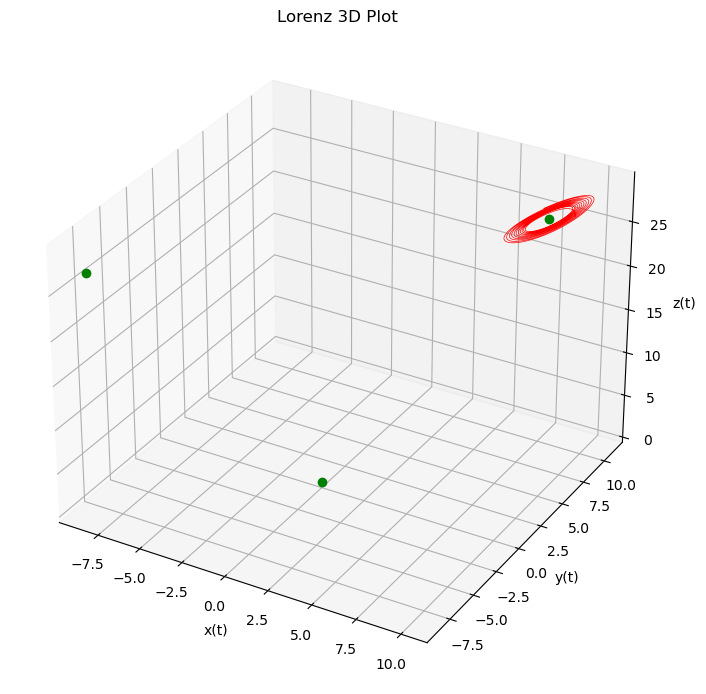

In [15]:
max_T = 7 #20
res = 100 #500 time resolution
npoints = max_T*res+1
t_eval = np.linspace(0, max_T, npoints)
base_point = fps[1]
offset = 1*np.array((1, 1, 0))
x0 = base_point+offset

sol = integrate.solve_ivp(f_lorenz, (0, max_T), x0, method='RK45', t_eval=t_eval, atol=1e-14)
t = sol.t
ys = sol.y
lorenz_ode_plot_components(t, ys)
lorenz_ode_plot_3d(t, ys, fps)

In [16]:
from utils import conjugate_dynamics

x_prime = translate(shift=base_point, dynamics=fp1_lorenz, debug=False)
#base_point = fps[0]
#x_prime = translate(shift=fps[0], dynamics=f_lorenz, debug=False)
y = diagonalize(x_prime, debug=False)
z = normal_form(y, debug=False)
print(z)

Transformation: x' = x - [ 8.48528137  8.48528137 27.        ], y = [[ 0.84498795+0.00000000e+00j -0.43804239-3.24374315e-17j
  -0.33222581+0.00000000e+00j]
 [-0.23428009+2.58093559e-01j  0.12145098+7.44819166e-01j
  -0.60309137-6.22258523e-02j]
 [-0.23428009-2.58093559e-01j  0.12145098-7.44819166e-01j
  -0.60309137+6.22258523e-02j]]*x', z = y + J(y, y) + K(y, y, y) 
z_dot = entry 1: 0 + 
(-13.854577914596032+0j) * x1 

entry 2: 0 + 
(0.09395562396468549+10.194505220927843j) * x2 

entry 3: 0 + 
(0.09395562396468549-10.194505220927843j) * x3 




In [17]:
computed_eigs = np.diag(z.dynamics.data[1])
print(beta+sigma+1)
print(beta*(sigma+rho))
print(2*beta*sigma*(rho-1))
for eig in computed_eigs:
    print(eig**3+eig*eig*(beta+sigma+1)+eig*beta*(sigma+rho)+2*beta*sigma*(rho-1))

13.666666666666666
101.33333333333333
1439.9999999999998
(1.5916157281026244e-12+0j)
(1.8189894035458565e-12+1.3642420526593924e-12j)
(1.8189894035458565e-12-1.3642420526593924e-12j)


In [18]:
max_T = 7
npoints = max_T*res+1
t_eval = np.linspace(0, max_T, npoints)
#sol = integrate.solve_ivp(f_lorenz, (0, max_T), x0, method='RK45', t_eval=t_eval, atol=1e-14)
ys = conjugate_dynamics(x_prime, t_eval, x0)

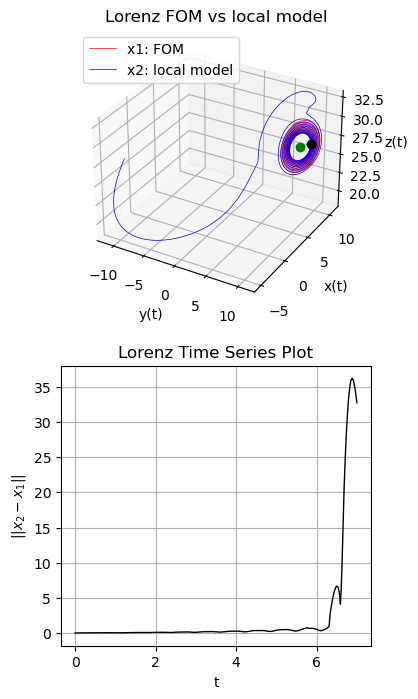

In [21]:
def compare_traces(t, ys1, ys2, base_point):
    x1, y1, z1 = ys1[0:3, :]
    x2, y2, z2 = ys2[0:3, :]
    diff = np.linalg.norm(ys2-ys1, axis=0)
    #f, (ax1, ax2) = plt.subplots(2, 1, figsize = (xsize, ysize))
    fig = plt.figure(figsize=plt.figaspect(2))
    ax1 = fig.add_subplot(2, 1, 1, projection='3d')
    ax1.plot(y1, x1, z1, linewidth = 0.5, color = 'r')
    ax1.plot(y2, x2, z2, linewidth = 0.5, color = 'b')
    ax1.plot(y1[0], x1[0], z1[0], 'ko')
    ax1.plot(base_point[1], base_point[0], base_point[2], 'go')   
    ax1.grid(True)
    ax1.set_xlabel('y(t)')
    ax1.set_ylabel('x(t)')
    ax1.set_zlabel('z(t)')
    ax1.set_title('Lorenz FOM vs local model')
    ax1.legend(['x1: FOM','x2: local model'], loc = 2)
    
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.plot(t, diff, linewidth = 1, color = 'k') 
    ax2.grid(True)
    ax2.set_xlabel('t')
    ax2.set_ylabel('$||x_2-x_1||$')
    ax2.set_title('Lorenz Time Series Plot')
    
    #plt.savefig('lorenz_ode_3d.png')
    plt.show()
    return

compare_traces(t_eval, ys[:, :npoints], ys_pred, base_point)

In [19]:
dist = np.linalg.norm(ys.T-np.tile(fps[1],(701, 1)), axis=-1)
err = np.linalg.norm(ys.T-ys_pred.T, axis=-1)
print(dist[600:])
print(err[600:])

[2.87654841 2.87103105 2.85634692 2.83286147 2.8011616  2.76220222
 2.71723161 2.66725155 2.61366719 2.5583258  2.50348715 2.45174314
 2.40587188 2.36861664 2.34239475 2.32896586 2.32932647 2.3438957
 2.37185197 2.41152084 2.46062103 2.51648156 2.57620974 2.63679598
 2.69517331 2.7487011  2.79511064 2.83237705 2.85893421 2.87377139
 2.8764707  2.86719299 2.84661605 2.81581911 2.77620759 2.72942665
 2.67735863 2.62216638 2.56630168 2.51246317 2.46348774 2.42215105
 2.39041571 2.36972069 2.36108109 2.36487856 2.38088461 2.40833365
 2.44603228 2.49248456 2.54594694 2.60427324 2.66532427 2.72706203
 2.78759928 2.84523505 2.89847314 2.94602921 2.98683105 3.02001524
 3.04495387 3.0609909  3.06748807 3.06410897 3.05082132 3.02789396
 2.99589241 2.95567312 2.90837584 2.85541296 2.79855427 2.74009449
 2.68204362 2.62669195 2.57662771 2.5345995  2.50329441 2.48503891
 2.4814558  2.49313672 2.51942526 2.55899586 2.60961049 2.66822004
 2.73148867 2.7960903  2.85888757 2.91700475 2.96781774 3.00912